In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [67]:
df=pd.read_csv('data/coll_trade_history.csv')

# Figuring out total P/L per pair

[]

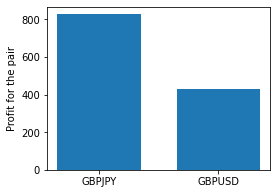

In [70]:
res=(df.groupby('Symbol')['Profit'].sum() + df.groupby('Symbol')['Commissions'].sum() )
plt.figure(figsize=(4,3))
plt.ylabel('Profit for the pair')
plt.bar(res.index,res.values,width=0.7)
plt.plot()

# calculating average trade time

In [5]:
average_trade_time=df['Trade duration in seconds'].sum()/len(df.index)
average_trade_time=(average_trade_time/60).round(2)
str(average_trade_time)+' minutes'

'11.96 minutes'

# Calculating time for winning and losing trades seperately

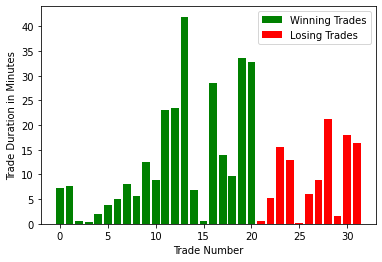

In [6]:
win_time=((df[df['Profit']>=0]['Trade duration in seconds']/60).round(2))
lose_time=((df[df['Profit']<0]['Trade duration in seconds']/60).round(2))
plt.xlabel('Trade Number')
plt.ylabel('Trade Duration in Minutes')

plt.bar(range(0,len(win_time)),win_time,color='Green',label='Winning Trades')
plt.bar(range(len(win_time),(len(win_time)+len(lose_time))),lose_time,color='Red',label='Losing Trades')
plt.legend()

# Calculating Balance Curve

In [7]:
acc_bal=10000
acc_bal_day_list=[]
df['Open']=pd.to_datetime(df['Open'],format='%d/%m/%y %H:%M',dayfirst=True,exact=True)
res=df.groupby([df['Open'].dt.month,df['Open'].dt.day])['Profit'].sum()

#Work on account Balance formatting for Y-Axis
for i in res.values:
    acc_bal=acc_bal+i
    acc_bal_day_list.append(acc_bal.round(2))
maximum=max(acc_bal_day_list)
#Work on formatting dates for X-Axis
date_list=[]
for i in res.index:
    date=dt.date(2022,i[0],i[1])
    date_list.append(str(date))

## Plotting Balance Curve

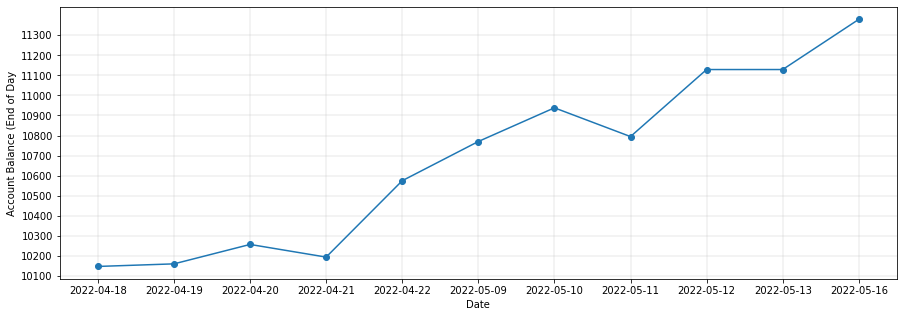

In [36]:
plt.figure(figsize=(15,5))
plt.grid(linewidth=0.3)
plt.xlabel('Date')
plt.yticks(range(10000,int(max(acc_bal_day_list)),100))
plt.ylabel('Account Balance (End of Day')
plt.plot(date_list,acc_bal_day_list,marker='o')
plt.show()

# Calculating and plotting Average Profit and loss

[]

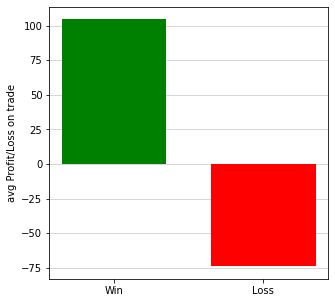

In [69]:
avg_profit=df[df['Profit']>=0]['Profit'].mean().round(2)
avg_loss=df[df['Profit']<0]['Profit'].mean().round(2)
plt.figure(figsize=(5,5))
plt.ylabel('avg Profit/Loss on trade')
plt.grid(linewidth=0.5,zorder=0,axis='y')
plt.bar(['Win','Loss'],[avg_profit,avg_loss],zorder=3,color=['Green','Red'],width=0.7,align='center')
plt.plot()